# A01 — EDA Warm-Up (California Housing)

**What to do (commit after each ✔):**
1. ✔ Run all cells once. Verify files appear in `A01-eda/data/` and `A01-eda/figs/`.
2. ✔ Change **one thing** (e.g., histogram `bins` or choose a different numeric column), re-run the affected cell(s).
3. ✔ Commit & push. Add a 2–3 sentence note in `A01-eda/README.md` about what changed and what you observed.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Find the repo root (folder containing .git). If not found, use current working directory.
REPO = Path.cwd()
for _ in range(10):
    if (REPO / ".git").exists():
        break
    if REPO.parent == REPO:
        break
    REPO = REPO.parent

# A01 root and output folders
A01 = REPO / "A01-eda"
DATA = A01 / "data"
FIGS = A01 / "figs"
DATA.mkdir(parents=True, exist_ok=True)
FIGS.mkdir(parents=True, exist_ok=True)

print("Repo root:", REPO)
print("A01 dir  :", A01)
print("Data dir :", DATA)
print("Figs dir :", FIGS)

Repo root: c:\Users\dww05002\code\opim5512-dww05002
A01 dir  : c:\Users\dww05002\code\opim5512-dww05002\A01-eda
Data dir : c:\Users\dww05002\code\opim5512-dww05002\A01-eda\data
Figs dir : c:\Users\dww05002\code\opim5512-dww05002\A01-eda\figs


In [2]:
from sklearn.datasets import fetch_california_housing

cal = fetch_california_housing(as_frame=True)
df = cal.frame.rename(columns={"MedHouseVal": "MedHomeVal_100k"})
df["MedHomeVal_$"] = df["MedHomeVal_100k"] * 100_000

print("Shape:", df.shape)
df.head()

Shape: (20640, 10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHomeVal_100k,MedHomeVal_$
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,342200.0


In [3]:
summary = df.describe(include="all").T
summary.to_csv(DATA / "summary.csv")
nulls = df.isna().sum().sort_values(ascending=False)
nulls.to_csv(DATA / "null_counts.csv")
summary.head(10)

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHomeVal_100k,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010
MedHomeVal_$,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,500001.000000


WindowsPath('c:/Users/dww05002/code/opim5512-dww05002/A01-eda/figs/hist_MedInc_30.png')

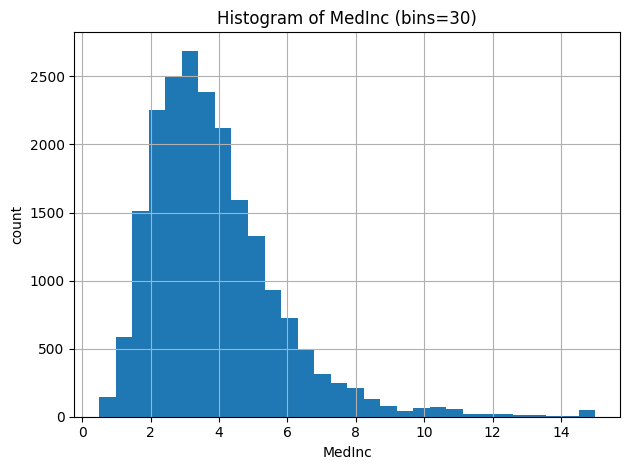

In [4]:
# Choose a numeric column and number of bins, then re-run this cell to regenerate the plot.
col = "MedInc"  # try changing this to another numeric column from df.columns
bins = 30       # try 50

assert col in df.columns, f"{col} not in dataframe columns"
assert pd.api.types.is_numeric_dtype(df[col]), f"{col} is not numeric"

plt.figure()
df[col].hist(bins=bins)
plt.title(f"Histogram of {col} (bins={bins})")
plt.xlabel(col); plt.ylabel("count")
plt.tight_layout()
out = FIGS / f"hist_{col}_{bins}.png"
plt.savefig(out, dpi=150)
out

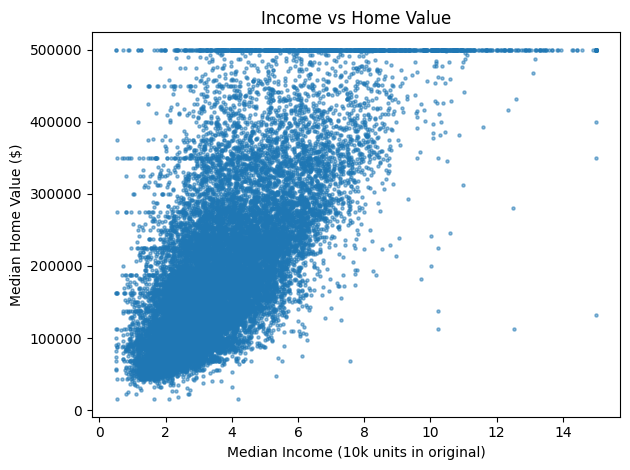

In [5]:
# Optional: scatter of income vs. home value if both columns exist
if {"MedInc", "MedHomeVal_$"}.issubset(df.columns):
    plt.figure()
    plt.scatter(df["MedInc"], df["MedHomeVal_$"], s=5, alpha=0.5)
    plt.xlabel("Median Income (10k units in original)")
    plt.ylabel("Median Home Value ($)")
    plt.title("Income vs Home Value")
    plt.tight_layout()
    out2 = FIGS / "scatter_income_value.png"
    plt.savefig(out2, dpi=150)
    out2
else:
    print("Columns for scatter not found; skipping.")

## Next steps
- Change `bins` or pick a different numeric `col` above, re-run the cell, and ensure a new PNG appears in `figs/`.
- Commit & push your changes with a meaningful message.
- Open an Issue titled **“A01 ready”** and paste your latest commit hash (`git log --oneline -1`).